# バックテスト検証ノート

In [1]:
import os
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [2]:
current_dir = %pwd
timestamp = os.path.basename(current_dir)

In [3]:
import sys
sys.path.append('/home/tsu-nera/repo/bakuchi/')
%cd '../../'

/home/ubuntu/repo/bakuchi


In [4]:
from src.utils.backtesting import Backtesting, run_backtesting

%reload_ext autoreload
%autoreload 2

In [5]:
bt = Backtesting(timestamp)

In [6]:
df_ex1 = bt.get_coincheck_df()
df_ex2 = bt.get_liquid_df()

In [7]:
len(df_ex1), len(df_ex2)

(933, 933)

## テスト実行

In [8]:
bt.run()

##  取引履歴

In [9]:
arbitrage_histories = bt.get_arbitrage_histories()

headers = ["取引日時", "購入取引所", "売却取引所", "通貨ペア", "取引量", "期待利益"]
arbitrage_histories_df = pd.DataFrame(arbitrage_histories, columns=headers)
arbitrage_histories_df

,取引日時,購入取引所,売却取引所,通貨ペア,取引量,期待利益
0,2021-04-13 16:50:27,bitbank,liquid,BTC/JPY,0.006,23
1,2021-04-13 16:54:20,liquid,bitbank,BTC/JPY,0.006,-16
2,2021-04-13 16:54:23,bitbank,liquid,BTC/JPY,0.006,13
3,2021-04-13 16:56:35,liquid,bitbank,BTC/JPY,0.006,-15
4,2021-04-13 16:57:58,bitbank,liquid,BTC/JPY,0.006,28
...,...,...,...,...,...,...
112,2021-04-13 17:36:38,liquid,bitbank,BTC/JPY,0.006,8
113,2021-04-13 17:36:53,bitbank,liquid,BTC/JPY,0.006,0
114,2021-04-13 17:37:06,liquid,bitbank,BTC/JPY,0.006,14
115,2021-04-13 17:37:22,bitbank,liquid,BTC/JPY,0.006,9


In [10]:
histories = bt.get_trade_histories()
headers = ["取引日時",  "売買",  "取引所", "レート"]
histories_df = pd.DataFrame(histories, columns=headers)
histories_df

,取引日時,売買,取引所,レート
0,2021-04-13 16:50:27,bitbank,買い,6667599.0
1,2021-04-13 16:50:27,liquid,売り,6671576.0
2,2021-04-13 16:54:20,liquid,買い,6682750.0
3,2021-04-13 16:54:20,bitbank,売り,6679999.0
4,2021-04-13 16:54:23,bitbank,買い,6679001.0
...,...,...,...,...
229,2021-04-13 17:37:06,bitbank,売り,6851250.0
230,2021-04-13 17:37:22,bitbank,買い,6850001.0
231,2021-04-13 17:37:22,liquid,売り,6851662.0
232,2021-04-13 17:37:41,bitbank,買い,6850001.0


## 結果まとめ

In [11]:
bt.display()

バックテスト情報
-------------------  -------------------
         レコード数                  933
           取引回数                  117
           開始日時  2021-04-13 16:50:27
           終了日時  2021-04-13 17:38:27
        取引時間[H]      0 days 00:48:00
      取引単位[BTC]                0.006
  利確しきい値[JPY]                 1000
損切りマージン[JPY]                 1000
-------------------  -------------------

バックテスト結果
-----------  --------
開始[JPY]       10000
終了[JPY]       10984
利益[JPY]         984
開始[BTC]       0.022
終了[BTC]       0.022
利益[BTC]           0
開始[TOTAL]    158842
終了[TOTAL]    158650
利益[TOTAL]  -191.112
-----------  --------


## グラフ出力

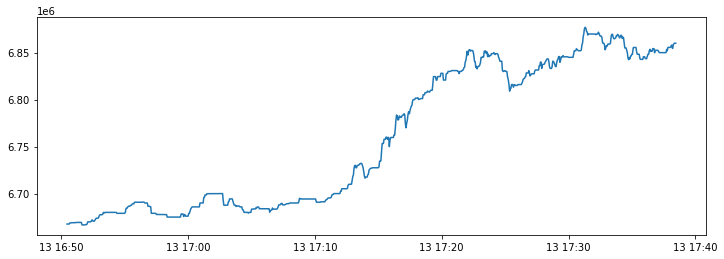

In [12]:
plt.figure(figsize=(12,4))
plt.plot(df_ex1.index, df_ex1['bid'])

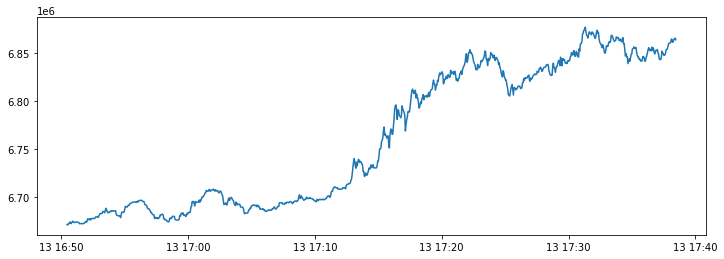

In [13]:
plt.figure(figsize=(12,4))
plt.plot(df_ex2.index, df_ex2['bid'])

## 分析

### 時間別の取引回数と利益

### 時間別の価格差の推移

In [14]:
profit_margin_df = pd.DataFrame({
    "timestamp": pd.to_datetime(df_ex1.index),
    "buy_ex1_sell_ex2": df_ex2.reset_index().bid - df_ex1.reset_index().ask,
    "buy_ex2_sell_ex1": df_ex1.reset_index().bid - df_ex2.reset_index().ask,
    'ex1_bid': df_ex1.reset_index().bid,
     'ex2_ask': df_ex2.reset_index().ask,
    'ex2_bid': df_ex2.reset_index().bid,
    'ex1_ask': df_ex1.reset_index().ask,
})

profit_margin_df = profit_margin_df.set_index("timestamp")

In [15]:
pd.options.display.float_format = '{:.0f}'.format
profit_margin_df.resample(rule='10Min').mean()

,buy_ex1_sell_ex2,buy_ex2_sell_ex1,ex1_bid,ex2_ask,ex2_bid,ex1_ask
timestamp,,,,,,
2021-04-13 16:50:00,3814,-5766,6677899,6683665,6682135,6678321
2021-04-13 17:00:00,5168,-6907,6689179,6696086,6694755,6689587
2021-04-13 17:10:00,4828,-7209,6748549,6755757,6753741,6748913
2021-04-13 17:20:00,-4664,1280,6834957,6833677,6831500,6836164
2021-04-13 17:30:00,-1929,-1200,6856894,6858094,6856025,6857955
